# Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

## Loading Data

In [3]:
ecg_data = pd.read_csv("./processed_data/ecg_processed_data.csv", index_col=0)

In [4]:
ecg_data.head()

,Record ID,Segment Start,Segment End,0,1,2,3,4,5,6,...,191,192,193,194,195,196,197,198,199,Annotation Class
0,100,13,213,0.059449,0.055308,0.052035,0.049666,0.047961,0.046922,0.046801,...,0.029812,0.031902,0.033233,0.033981,0.034276,0.034166,0.033702,0.033134,0.032648,N
1,100,307,507,0.084239,0.087566,0.088956,0.088621,0.086919,0.084459,0.081823,...,0.020380,0.020170,0.020049,0.020272,0.020719,0.020971,0.020866,0.020622,0.020434,N
2,100,563,763,-0.006937,-0.005690,-0.005184,-0.005172,-0.005405,-0.005802,-0.006385,...,-0.083923,-0.084476,-0.084798,-0.084841,-0.084325,-0.082953,-0.080644,-0.077424,-0.073181,N
3,100,883,1083,0.072086,0.073128,0.073026,0.071802,0.069731,0.067336,0.065156,...,0.040917,0.040820,0.040605,0.040177,0.039328,0.038051,0.036671,0.035565,0.034817,N
4,100,1168,1368,0.084762,0.083995,0.082327,0.080127,0.077701,0.075216,0.072963,...,0.024691,0.025225,0.025977,0.027249,0.029211,0.031715,0.034364,0.036462,0.037443,N


In [5]:
ecg_data["Annotation Class"].unique()

array(['N', 'V', '/', 'L', 'R'], dtype=object)

In [6]:
ecg_data["Annotation Class"].nunique()

5

In [7]:
ecg_data["Annotation Class"].value_counts()

Annotation Class
N    73439
L     8068
R     7255
V     6793
/     3619
Name: count, dtype: int64

## Preprocessing

### Converting Non Numeric Column to Numeric discontinuous Columns

In [8]:
annotation_dict = dict()
for i, symbol in enumerate(ecg_data["Annotation Class"].unique()):
    annotation_dict[symbol] = i + 1
ecg_data["Annotation Class Numeric"] = ecg_data["Annotation Class"].apply(
    lambda x: annotation_dict[x]
)

In [9]:
ecg_data.head()

,Record ID,Segment Start,Segment End,0,1,2,3,4,5,6,...,192,193,194,195,196,197,198,199,Annotation Class,Annotation Class Numeric
0,100,13,213,0.059449,0.055308,0.052035,0.049666,0.047961,0.046922,0.046801,...,0.031902,0.033233,0.033981,0.034276,0.034166,0.033702,0.033134,0.032648,N,1
1,100,307,507,0.084239,0.087566,0.088956,0.088621,0.086919,0.084459,0.081823,...,0.020170,0.020049,0.020272,0.020719,0.020971,0.020866,0.020622,0.020434,N,1
2,100,563,763,-0.006937,-0.005690,-0.005184,-0.005172,-0.005405,-0.005802,-0.006385,...,-0.084476,-0.084798,-0.084841,-0.084325,-0.082953,-0.080644,-0.077424,-0.073181,N,1
3,100,883,1083,0.072086,0.073128,0.073026,0.071802,0.069731,0.067336,0.065156,...,0.040820,0.040605,0.040177,0.039328,0.038051,0.036671,0.035565,0.034817,N,1
4,100,1168,1368,0.084762,0.083995,0.082327,0.080127,0.077701,0.075216,0.072963,...,0.025225,0.025977,0.027249,0.029211,0.031715,0.034364,0.036462,0.037443,N,1


In [10]:
x_columns = [str(i) for i in range(0, 200)]

## What each Annotation looks like?

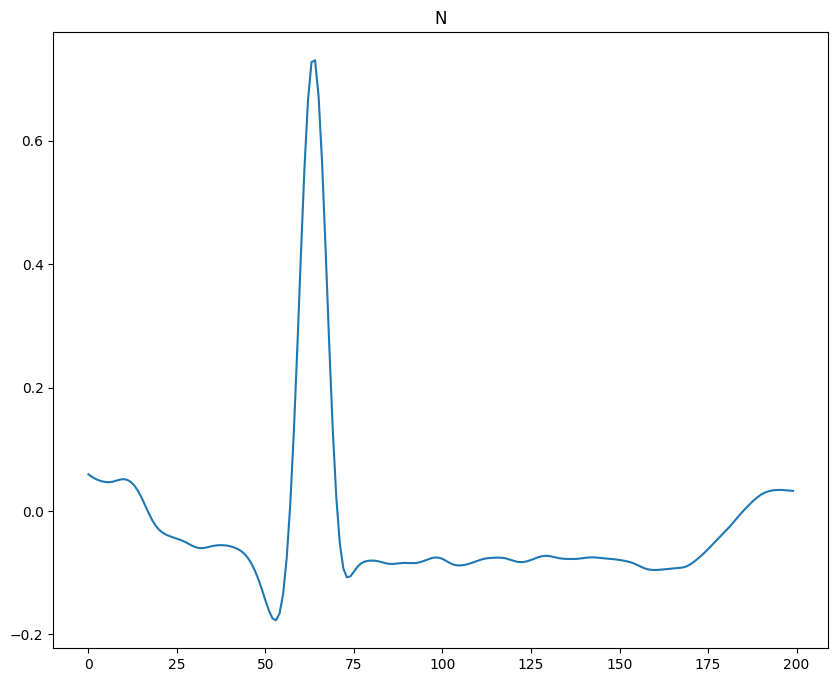

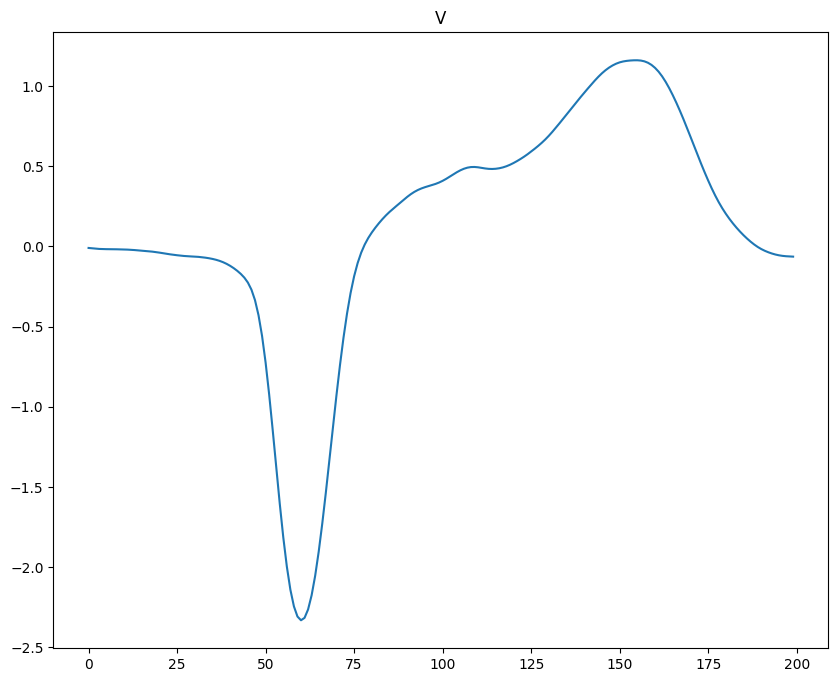

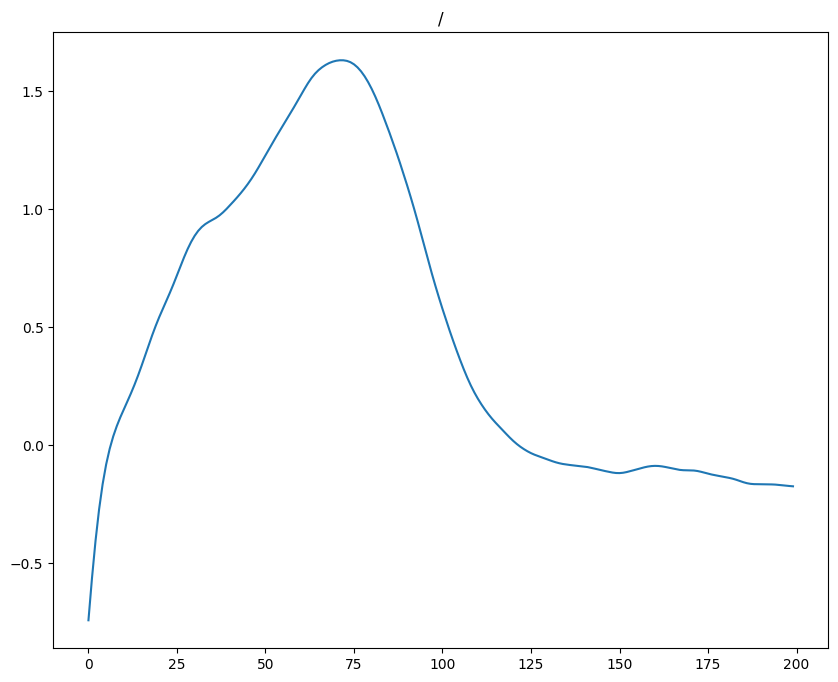

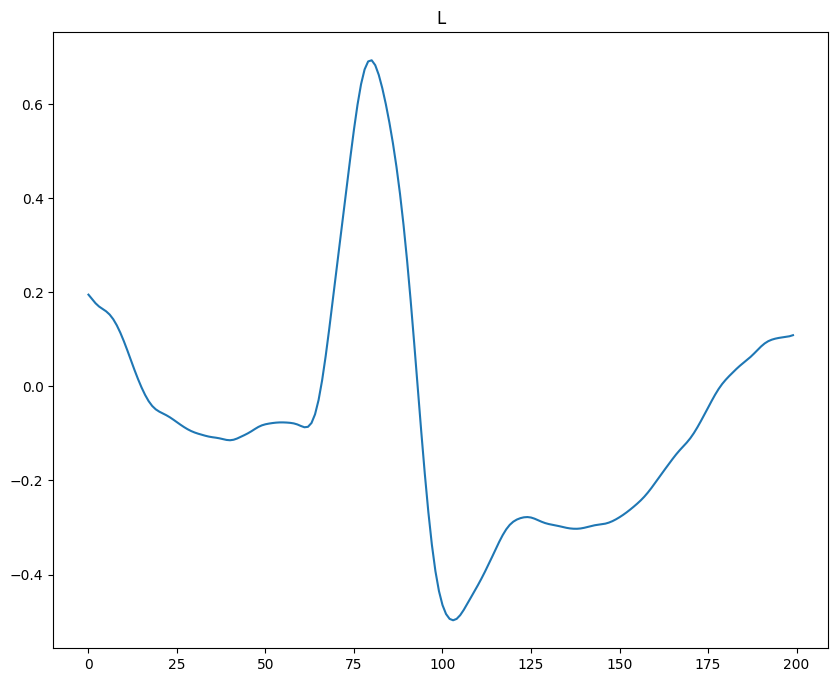

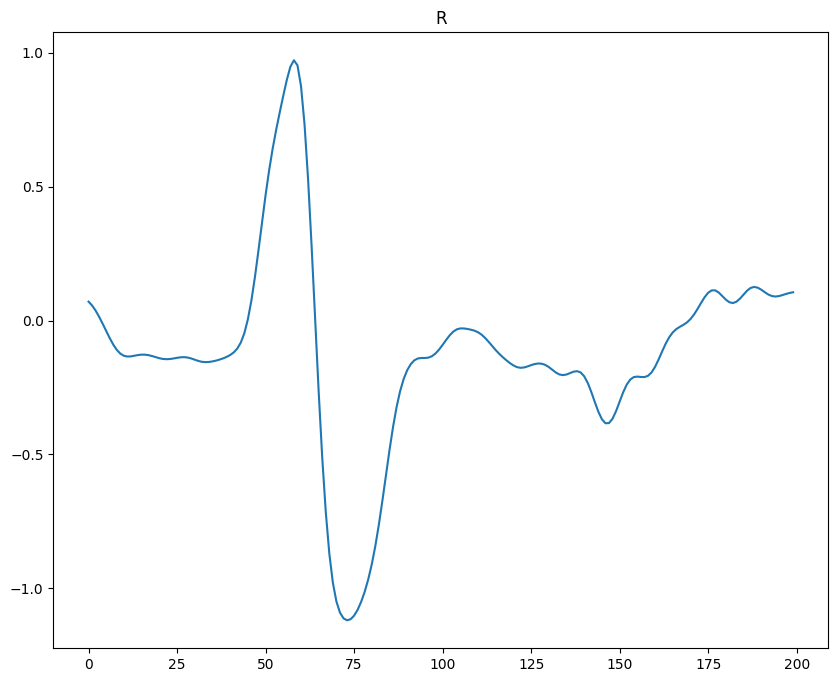

In [11]:
for symbol in ecg_data["Annotation Class"].unique():
    readings = (
        ecg_data[ecg_data["Annotation Class"] == symbol].head(1)[x_columns].values[0]
    )
    plt.figure(figsize=(10, 8))
    plt.title(label=symbol)
    plt.plot(readings)
    plt.show()

## Splitting into Test and Train Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = ecg_data[x_columns].values

In [16]:
y = ecg_data["Annotation Class Numeric"].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101, stratify=y, shuffle=True
)
X_train_1, X_val, y_train_1, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, shuffle=True, random_state=101
)

In [18]:
X_train.shape

(79339, 200)

In [19]:
y_train.shape

(79339,)

In [20]:
X_test.shape

(19835, 200)

In [21]:
y_test.shape

(19835,)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [23]:
from skopt import BayesSearchCV

In [24]:
lr_params = {"multi_class": ["ovr", "multinomial", "auto"]}

In [25]:
pipeline = Pipeline(
    [
        ("minmax", MinMaxScaler()),
        ("lr", GridSearchCV(LogisticRegression(), lr_params, verbose=3)),
    ]
)

In [26]:
pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...................multi_class=ovr;, score=0.839 total time=  11.4s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...................multi_class=ovr;, score=0.843 total time=  13.2s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...................multi_class=ovr;, score=0.843 total time=  10.8s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...................multi_class=ovr;, score=0.845 total time=  11.3s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...................multi_class=ovr;, score=0.839 total time=  12.8s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...........multi_class=multinomial;, score=0.840 total time=  16.8s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...........multi_class=multinomial;, score=0.842 total time=   9.1s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...........multi_class=multinomial;, score=0.840 total time=  11.6s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...........multi_class=multinomial;, score=0.838 total time=  10.5s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...........multi_class=multinomial;, score=0.832 total time=  11.0s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..................multi_class=auto;, score=0.840 total time=  16.4s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..................multi_class=auto;, score=0.842 total time=  14.3s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..................multi_class=auto;, score=0.840 total time=  11.4s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..................multi_class=auto;, score=0.838 total time=  12.4s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..................multi_class=auto;, score=0.832 total time=  12.7s


/home/alton/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('minmax', MinMaxScaler()),
                ('lr',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'multi_class': ['ovr', 'multinomial',
                                                          'auto']},
                              verbose=3))])

In [27]:
pred = pipeline.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [29]:
print(confusion_matrix(y_test, pred))

[[14562    27     1    66    32]
 [  647   476    22   112   101]
 [    6     3   703    12     0]
 [ 1051    26     1   534     2]
 [  981    14     0    23   433]]


In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.84      0.99      0.91     14688
           2       0.87      0.35      0.50      1358
           3       0.97      0.97      0.97       724
           4       0.71      0.33      0.45      1614
           5       0.76      0.30      0.43      1451

    accuracy                           0.84     19835
   macro avg       0.83      0.59      0.65     19835
weighted avg       0.83      0.84      0.81     19835



## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
error_rate = []
for i in range(1, 5000, 500):
    knn = Pipeline(
        [("minmax", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=i))]
    )
    knn.fit(X_train_1, y_train_1)
    pred_i = knn.predict(X_val)
    print(f"Neighbours {i}")
    print(f"Loss: {np.mean(pred_i !=y_val)}")
    # Take the mean where prediction is not equal to actual
    error_rate.append(np.mean(pred_i != y_val))

Neighbours 1
Loss: 0.004726493571968742
Neighbours 501
Loss: 0.053062767834635746
Neighbours 1001
Loss: 0.08343836652382153
Neighbours 1501
Loss: 0.11828837912780439
Neighbours 2001
Loss: 0.14866397781699017
Neighbours 2501
Loss: 0.1872321653642551
Neighbours 3001
Loss: 0.2096672548525334
Neighbours 3501
Loss: 0.21785984371061257
Neighbours 4001
Loss: 0.22384673556843962
Neighbours 4501
Loss: 0.22920342828333753


Text(0, 0.5, 'Error Rate')

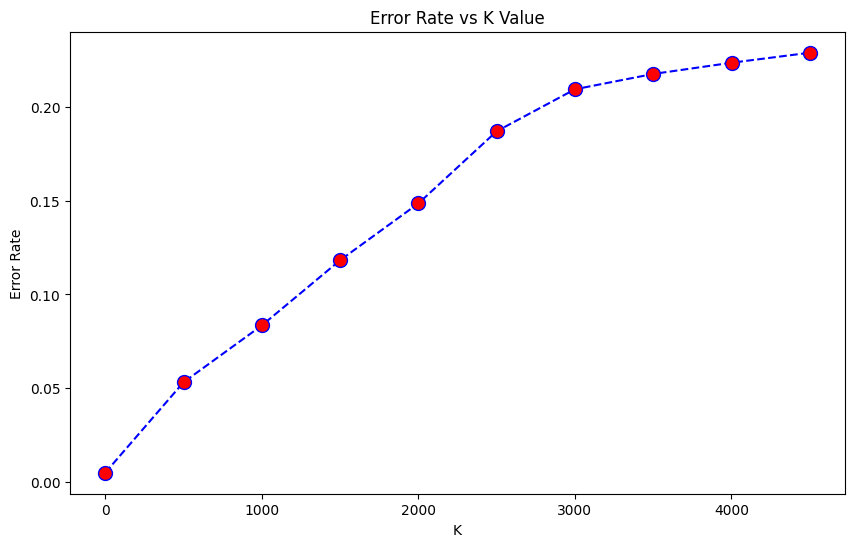

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, 5000, 500),
    error_rate,
    color="blue",
    linestyle="dashed",
    marker="o",
    markerfacecolor="red",
    markersize=10,
)
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [34]:
knn = Pipeline(
    [("minmax", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)
knn.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [35]:
pred = knn.predict(X_test)

In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14688
           2       0.98      0.95      0.96      1358
           3       1.00      1.00      1.00       724
           4       0.99      0.99      0.99      1614
           5       0.99      1.00      0.99      1451

    accuracy                           0.99     19835
   macro avg       0.99      0.99      0.99     19835
weighted avg       0.99      0.99      0.99     19835



In [37]:
print(confusion_matrix(y_test, pred))

[[14659    20     2     3     4]
 [   47  1288     1    18     4]
 [    0     0   723     1     0]
 [    7     4     0  1603     0]
 [    6     0     0     1  1444]]


In [38]:
print(accuracy_score(y_test, pred))

0.9940509200907487


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
}
dt = Pipeline(
    [
        ("minmax", MinMaxScaler()),
        ("Bayes", GridSearchCV(DecisionTreeClassifier(), dt_params, verbose=3)),
    ]
)

In [41]:
dt.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.979 total time=  45.1s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.978 total time=  42.1s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.979 total time=  39.7s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.978 total time=  43.6s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.979 total time=  40.9s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.982 total time=   3.7s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.980 total time=   4.4s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.981 total time=   2.9s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.983 total time=   3.5s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.984 total time=   3.1s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.984 total time=  34.7s
[CV 2/5] END ..criterion=entropy, splitter=best;,

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('Bayes',
                 GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy',
                                                        'log_loss'],
                                          'splitter': ['best', 'random']},
                              verbose=3))])

In [42]:
pred_val = dt.predict(X_val)

In [43]:
print(confusion_matrix(y_val, pred_val))

[[11663    40     1    24    22]
 [   52  1008     7    13     7]
 [    2     6   569     2     0]
 [   25    15     0  1250     1]
 [   20    10     0     2  1129]]


In [44]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     11750
           2       0.93      0.93      0.93      1087
           3       0.99      0.98      0.98       579
           4       0.97      0.97      0.97      1291
           5       0.97      0.97      0.97      1161

    accuracy                           0.98     15868
   macro avg       0.97      0.97      0.97     15868
weighted avg       0.98      0.98      0.98     15868



In [45]:
pred = dt.predict(X_test)

In [46]:
print(confusion_matrix(y_test, pred))

[[14585    60     2    21    20]
 [   66  1255     5    16    16]
 [    4     4   715     1     0]
 [   22    17     0  1570     5]
 [   27     3     0     2  1419]]


In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99     14688
           2       0.94      0.92      0.93      1358
           3       0.99      0.99      0.99       724
           4       0.98      0.97      0.97      1614
           5       0.97      0.98      0.97      1451

    accuracy                           0.99     19835
   macro avg       0.97      0.97      0.97     19835
weighted avg       0.99      0.99      0.99     19835



## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rand = Pipeline(
    [("minmax", MinMaxScaler()), ("rand", RandomForestClassifier(criterion="gini"))]
)

In [50]:
rand.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('rand', RandomForestClassifier())])

In [51]:
pred_val = rand.predict(X_val)

In [52]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     11750
           2       0.97      0.96      0.96      1087
           3       1.00      0.99      0.99       579
           4       0.99      0.97      0.98      1291
           5       1.00      0.98      0.99      1161

    accuracy                           0.99     15868
   macro avg       0.99      0.98      0.99     15868
weighted avg       0.99      0.99      0.99     15868



In [53]:
print(confusion_matrix(y_val, pred_val))

[[11731    18     0     1     0]
 [   38  1041     2     5     1]
 [    2     2   574     1     0]
 [   23    10     0  1258     0]
 [   24     1     0     0  1136]]


In [54]:
pred = rand.predict(X_test)

In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     14688
           2       0.98      0.95      0.96      1358
           3       1.00      1.00      1.00       724
           4       0.99      0.98      0.99      1614
           5       1.00      0.99      0.99      1451

    accuracy                           0.99     19835
   macro avg       0.99      0.98      0.99     19835
weighted avg       0.99      0.99      0.99     19835



In [56]:
print(confusion_matrix(y_test, pred))

[[14667    15     1     3     2]
 [   59  1289     2     5     3]
 [    2     1   721     0     0]
 [   19    14     0  1581     0]
 [   16     1     0     2  1432]]


## SVM

In [57]:
from sklearn.svm import SVC

In [58]:
svm_param_grid = {"C": [0.1, 1, 10, 100, 1000], "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}

In [59]:
svm = Pipeline([("minmax", MinMaxScaler()), ("SVM", SVC(C=0.1, gamma=1))])

In [60]:
svm.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('SVM', SVC(C=0.1, gamma=1))])

In [61]:
pred_val = svm.predict(X_val)

In [62]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99     11750
           2       0.95      0.92      0.94      1087
           3       0.99      0.99      0.99       579
           4       0.97      0.93      0.95      1291
           5       0.99      0.91      0.95      1161

    accuracy                           0.98     15868
   macro avg       0.98      0.95      0.96     15868
weighted avg       0.98      0.98      0.98     15868



In [63]:
print(confusion_matrix(y_val, pred_val))

[[11687    34     0    21     8]
 [   73   996     5    11     2]
 [    1     3   574     1     0]
 [   83     9     0  1199     0]
 [   98     1     0     0  1062]]


In [64]:
pred = svm.predict(X_test)

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99     14688
           2       0.95      0.90      0.93      1358
           3       1.00      1.00      1.00       724
           4       0.97      0.93      0.95      1614
           5       0.98      0.92      0.95      1451

    accuracy                           0.98     19835
   macro avg       0.98      0.95      0.96     19835
weighted avg       0.98      0.98      0.98     19835



In [66]:
print(confusion_matrix(y_test, pred))

[[14608    39     0    32     9]
 [  102  1228     2    14    12]
 [    1     1   722     0     0]
 [   95    17     0  1502     0]
 [  118     2     0     1  1330]]


## Gaussian Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
gnb = Pipeline([("minmax", MinMaxScaler()), ("GNB", GaussianNB())])

In [69]:
gnb.fit(X_train_1, y_train_1)

Pipeline(steps=[('minmax', MinMaxScaler()), ('GNB', GaussianNB())])

In [70]:
pred_val = gnb.predict(X_val)

In [71]:
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           1       0.94      0.69      0.79     11750
           2       0.44      0.56      0.50      1087
           3       0.63      0.93      0.75       579
           4       0.29      0.79      0.42      1291
           5       0.54      0.72      0.62      1161

    accuracy                           0.70     15868
   macro avg       0.57      0.74      0.62     15868
weighted avg       0.82      0.70      0.73     15868



In [72]:
print(confusion_matrix(y_val, pred_val))

[[8065  649  143 2232  661]
 [  23  612  173  236   43]
 [   0   39  540    0    0]
 [ 188   71    5 1021    6]
 [ 265    8    0   56  832]]


In [73]:
pred = gnb.predict(X_test)

In [74]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.70      0.81     14688
           2       0.44      0.55      0.49      1358
           3       0.67      0.94      0.78       724
           4       0.30      0.80      0.43      1614
           5       0.56      0.72      0.63      1451

    accuracy                           0.71     19835
   macro avg       0.58      0.74      0.63     19835
weighted avg       0.82      0.71      0.74     19835



In [75]:
print(confusion_matrix(y_test, pred))

[[10325   807   149  2660   747]
 [   38   748   174   324    74]
 [    1    44   678     1     0]
 [  217    91     6  1291     9]
 [  341    13     0    53  1044]]


# ANN

In [76]:
from tensorflow.keras.models import Sequential

2023-07-05 10:24:47.054506: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 10:24:47.210747: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-05 10:24:47.212063: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 10:24:49.061011: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [77]:
from tensorflow.keras.layers import Dense, Dropout

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
from keras.utils import to_categorical

In [80]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [81]:
model = Sequential()

In [82]:
model.add(Dense(300, activation="relu"))

In [83]:
model.add(Dropout(0.5))

In [84]:
model.add(Dense(150, activation="relu"))

In [85]:
model.add(Dropout(0.5))

In [86]:
model.add(Dense(75, activation="relu"))

In [87]:
model.add(Dropout(0.5))

In [88]:
model.add(Dense(35, activation="relu"))

In [89]:
model.add(Dropout(0.5))

In [90]:
model.add(Dense(15, activation="relu"))

In [91]:
model.add(Dropout(0.5))

In [92]:
model.add(Dense(5, activation="softmax"))

In [93]:
model.compile(loss="categorical_crossentropy", optimizer="adam")

In [94]:
model.fit(
    x=X_train_1,
    y=to_categorical(y_train_1)[:, 1:],
    epochs=600,
    validation_data=(X_val, to_categorical(y_val)[:, 1:]),
    batch_size=32,
    callbacks=[early_stop],
)

Epoch 1/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.6362 - val_loss: 0.3861
Epoch 2/600
1984/1984 [==============================] - 10s 5ms/step - loss: 0.4144 - val_loss: 0.2850
Epoch 3/600
1984/1984 [==============================] - 10s 5ms/step - loss: 0.3508 - val_loss: 0.2124
Epoch 4/600
1984/1984 [==============================] - 10s 5ms/step - loss: 0.3092 - val_loss: 0.1773
Epoch 5/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.2719 - val_loss: 0.1573
Epoch 6/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.2562 - val_loss: 0.1316
Epoch 7/600
1984/1984 [==============================] - 11s 6ms/step - loss: 0.2406 - val_loss: 0.1300
Epoch 8/600
1984/1984 [==============================] - 11s 5ms/step - loss: 0.2297 - val_loss: 0.1213
Epoch 9/600
1984/1984 [==============================] - 11s 6ms/step - loss: 0.2280 - val_loss: 0.1042
Epoch 10/600
1984/1984 [==============================] - 11s 6m

In [95]:
losses = pd.DataFrame(model.history.history)

<Axes: >

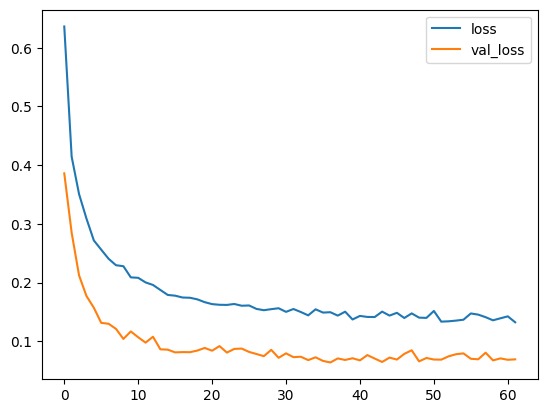

In [96]:
losses.plot()

In [97]:
probs = model.predict(X_test)

620/620 [==============================] - 1s 2ms/step


In [98]:
preds = np.argmax(probs, axis=1)

In [99]:
preds = preds + 1

In [100]:
y_test

array([3, 1, 1, ..., 1, 2, 1])

In [101]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99     14688
           2       0.98      0.93      0.95      1358
           3       1.00      1.00      1.00       724
           4       0.98      0.99      0.98      1614
           5       0.99      0.99      0.99      1451

    accuracy                           0.99     19835
   macro avg       0.99      0.98      0.98     19835
weighted avg       0.99      0.99      0.99     19835



In [102]:
print(confusion_matrix(y_test, preds))

[[14638    21     1    18    10]
 [   84  1257     1    11     5]
 [    1     0   722     1     0]
 [   10     9     0  1592     3]
 [   10     0     0     1  1440]]
